
# Project: Investigate a Dataset - [TMDB moive data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> TMDB dataset is a movie dataset collected over years shows some information about each moive like when it is relesed, the popularity, revenue, genres, cast and more, it consist of 21 columns and more than 10000 row.


### Question(s) for Analysis
>1- how the movie industry increase every year?<br>
>2- what is the most frequant genres over years?<br>
>3- is the revenue increases over the last 30 years?<br>
>4- what is the ratio for high and low revenue moive over the total movies over years 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> in data wrangling we start investigating the dataset and cleaning it


### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
movies_df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
movies_df.head()
#  drop the columns that we won't work with
movies_df.drop(columns=['id', 'imdb_id', 'cast', 'director', 'tagline', 
    'production_companies', 'release_date', 'overview', 'keywords', 'homepage', 'budget_adj', 'revenue_adj'], inplace=True)
movies_df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015


In [4]:
movies_df.shape

(10866, 9)

>the dataset has 21 columns and 10866 row 

In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 764.1+ KB


> wecan see that genres has some nan values


### Data Cleaning

> some null values exist in genres so we will drop it

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
movies_df.dropna(axis=0, inplace=True)

In [7]:
movies_df.isna().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

> no null values found

In [8]:
movies_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.000000,10843.000000,10843.000000
mean,0.647456,1.465672e+07,3.990779e+07,102.137508,217.813705,5.973974,2001.315595
std,1.000986,3.093864e+07,1.171131e+08,31.293320,576.155351,0.934260,12.813298
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.208253,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.384555,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.715349,1.500000e+07,2.413675e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


> in describe function we saw that in budget, revenue and runtime we have alot of zero values 

In [9]:
# see how duplicate row and drop them
movies_df.duplicated().sum()
movies_df.drop_duplicates(inplace=True)

> investigate the count of zeros for budget, revenue, and runtime

In [10]:
movies_df[movies_df['budget']==0].count()['budget']

5674

In [11]:
movies_df[movies_df['revenue']==0].count()['revenue']

5993

In [12]:
movies_df[movies_df['runtime']==0].count()['runtime']

30

> here we try to fix the zero values for budget, revenue, and runtime by replacing the zeros with the mean value

In [13]:
# first step -> is to but all zeros no nan
# second step -> we will but the mean for budget, revenue and runtime for every null value
nan_list = ['budget', 'revenue', 'runtime'] # list to fill it with the mean
for col in nan_list:
    mean = movies_df[col].mean()
    movies_df[col] = movies_df[col].replace(0, mean)
    #movies_df[col] = movies_df[col].fillna(mean)


In [14]:
movies_df.describe()
# as we can see the statsitcs is changed

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000
mean,0.647461,2.232495e+07,6.197271e+07,102.421062,217.823649,5.974064,2001.314794
std,1.001032,2.803615e+07,1.111273e+08,30.828622,576.180993,0.934257,12.813617
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,0.208210,1.465531e+07,3.991138e+07,90.000000,17.000000,5.400000,1995.000000
50%,0.384532,1.465531e+07,3.991138e+07,99.000000,38.000000,6.000000,2006.000000
75%,0.715393,1.500000e+07,3.991138e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


> here we see that we solve the problem

<a id='eda'></a>
## Exploratory Data Analysis

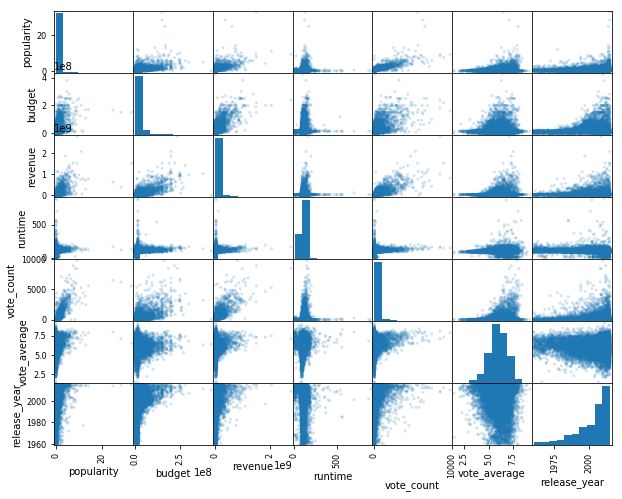

In [15]:
pd.plotting.scatter_matrix(movies_df, alpha=0.2, figsize=(10,8));

> histograms and scatter plots for columns which represent the correlation for the columns with each other

> now we will start answring the questions we asked about the data using the appropriate visualization method.

### Research Question 1 (how the movie industry increases every year?)

In [16]:
def df_plot(df, k):
    if len(k) > 0:
        df.plot(kind=k)
    else:
        df.plot()
    
def set_labels(x_l,y_l, title):
    plt.xlabel(x_l)
    plt.ylabel(y_l)
    plt.title(title)
    

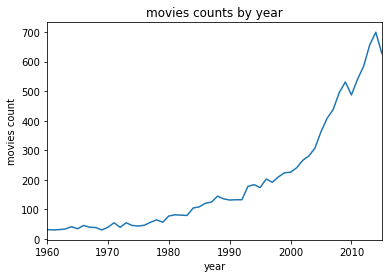

In [17]:
release_year_df = movies_df['release_year'].value_counts().sort_index()
df_plot(release_year_df, k="")
#release_year_df.sort_index().plot()
set_labels('year', 'movies count', 'movies counts by year');

> as we cans see in the figure that the released movies increases every year especially from 2000-2015 and it is peek in 2014

### Research Question 2  (what is the most frequant genres over years?)

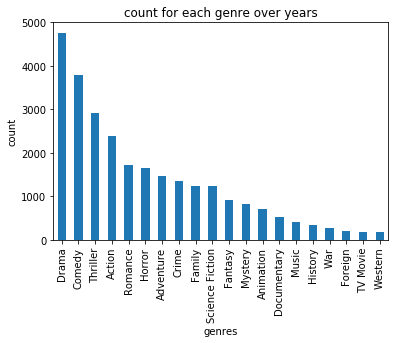

In [18]:
## to answer this question we need to convert the genres column to a single value columns
# copy of both the dataset and the columns
movies_df2 = movies_df.copy()
columns_names = movies_df.columns.copy()
# turn the coulnms to list
columns_names = columns_names.to_list()
# drop the geners from the list
columns_names.remove('genres')
movies_df2['genres'] = movies_df['genres'].str.split('|')
# set the idicies and convert the genres to a pandas series 
movies_df2 = movies_df2.set_index(columns_names)['genres'].apply(pd.Series)
# stack the columns values, drop the new columns and then rename the last coulmn got new_genre 
movies_df2 = movies_df2.stack().reset_index().drop('level_8', axis=1).rename(columns={0: 'new_genre'})
# plot the figure
df_plot(movies_df2['new_genre'].value_counts(), k='bar')
set_labels('genres', 'count', 'count for each genre over years');


> as we can see here the drama is the most frequant then comedy 

### Research Question 3  (is the revenue increases over the last 30 years?)

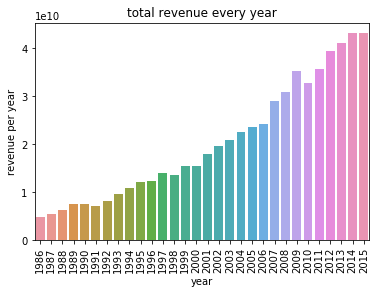

In [19]:
# group the data by the release year
df = movies_df.groupby('release_year')
# create the plot for last 30 years 
sns.barplot(x=np.arange(1960,2016)[-30:], y=df['revenue'].sum()[-30:])
# rotate the ticks on X-axis 
plt.xticks(rotation=90)
plt.xlabel("year")
plt.ylabel("revenue per year")
plt.title("total revenue every year");

> the revenue is inceasing over years until reach the maximun in 2015

### Research Question 4  (what is the ratio for high and low revenue moive over the total movies over years?)

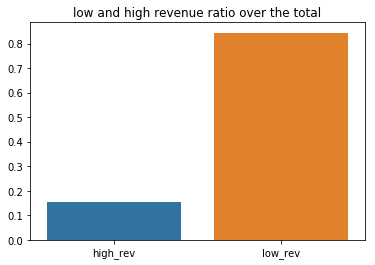

In [20]:
revenue_avr = movies_df['revenue'].mean()
df_hrev = movies_df.query('revenue >= {}'.format(revenue_avr)).count()
df_lrev = movies_df.query('revenue < {}'.format(revenue_avr)).count()
total = movies_df['revenue'].count()
sns.barplot(x=['high_rev', 'low_rev'], y=[df_hrev['revenue']/total, df_lrev['revenue']/total])
plt.title('low and high revenue ratio over the total');

<a id='conclusions'></a>
## Conclusions

> we explore the TMDB dataset using our question and try to answer them in visualization manner
so for every question the answer is <br>
>1- the released movies increases every year especially from 2000-2015 and it is peek in 2014<br>
>2- we can see that the drama is the most frequant then comedy <br>
>3- the revenue is inceasing over years until reach the maximun in 2015 <br>
>4- low revenue movies is more than the high revenue by more than the triple percantage

### Limitations
> This dataset is not really an good representation of the movies industry through to number of missing values, wrong values such as the zero values in budget and revenue.

In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0